In [1]:
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.nn.modules.module import Module

In [43]:
class FuncNet(Module):

    def __init__(self):
        super(FuncNet, self).__init__()

        H = 20
        self._layers = [
            torch.nn.Linear(1, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, 1),
        ]

        self._model = torch.nn.Sequential(*self._layers)
        
        self._model.cuda()

    def forward(self, *input):
        return self._model(*input)

func_net = FuncNet()
 
loss_fn = torch.nn.MSELoss(size_average=False)
loss_val_fn = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.SGD(func_net.parameters(), lr=1e-4)

C = 100
batch_size = 32

f = lambda x: torch.sqrt(torch.mul(x, C))

for epoch in range(50000):
    x = Variable(torch.mul(torch.rand(batch_size, 1), 100)).cuda()
    y_pred = func_net(x)
    y = f(x)
    
    tr_loss = loss_fn(y_pred, y)
    
    x_val = Variable(torch.mul(torch.rand(batch_size, 1), 100), requires_grad=False).cuda()
    y_val = f(x_val)
    y_val_pred = func_net(x_val)
    val_loss = loss_val_fn(y_val_pred, y_val)
        
    if epoch % 5000 == 0:
        print("({2}) Losses: {0:.5f} {1:.5f}".format(tr_loss.data.cpu().numpy()[0], val_loss.data.cpu().numpy()[0], epoch))

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()

(0) Losses: 207924.15625 197852.29688


(5000) Losses: 12343.46094 13234.54590


(10000) Losses: 11288.56055 25869.25391


(15000) Losses: 18128.70312 17955.61523


(20000) Losses: 20201.23047 12593.58203


(25000) Losses: 16345.78906 16185.15430


(30000) Losses: 15182.40820 14415.92285


(35000) Losses: 14778.09766 20112.81250


(40000) Losses: 15801.69922 19297.00586


(45000) Losses: 17767.71484 12060.68359


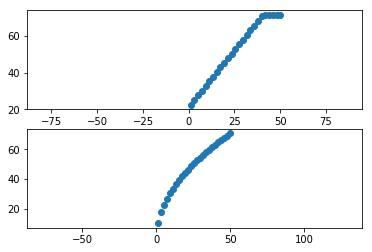

In [41]:
x_pred = Variable(torch.linspace(1, 50, steps=25).view(-1,1), requires_grad=False).cuda()
y_pred = func_net(x_pred)
y_true = f(x_pred)

plt.figure(1)
plt.subplot(211)
plt.axis('equal')
plt.xlim((1, 5))
plt.scatter(x_pred.data.cpu().numpy(), y_pred.data.cpu().numpy())

plt.figure(1)
plt.subplot(212)
plt.axis('equal')
# plt.xlim((1, 50))
plt.scatter(x_pred.data.cpu().numpy(), y_true.data.cpu().numpy())


plt.show()